# DBSCAN - Iris Dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score

In [2]:
data = load_iris()

df = pd.DataFrame(data=data.data, columns=data.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
df["Species"] = data.target
df["Species_Name"] = df["Species"]

for index, row in df.iterrows():
    species = int(row["Species"])
    df.loc[index, "Species_Name"] = data.target_names[species]

df.sample(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species,Species_Name
52,6.9,3.1,4.9,1.5,1,versicolor
137,6.4,3.1,5.5,1.8,2,virginica
114,5.8,2.8,5.1,2.4,2,virginica
9,4.9,3.1,1.5,0.1,0,setosa
53,5.5,2.3,4.0,1.3,1,versicolor
56,6.3,3.3,4.7,1.6,1,versicolor
66,5.6,3.0,4.5,1.5,1,versicolor
32,5.2,4.1,1.5,0.1,0,setosa
146,6.3,2.5,5.0,1.9,2,virginica
24,4.8,3.4,1.9,0.2,0,setosa


## Elbow Chart

In [11]:
X = df[data.feature_names]
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [15]:
# k = 2 * number_of_features

nn = NearestNeighbors(n_neighbors=8)
neighbors = nn.fit(X)
distances, indices = neighbors.kneighbors(X)
distances = np.sort(distances, axis=0)

distances

array([[0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.1       ],
       [0.        , 0.1       ],
       [0.        , 0.1       ],
       [0.        , 0.1       ],
       [0.        , 0.1       ],
       [0.        , 0.1       ],
       [0.        , 0.1       ],
       [0.        , 0.1       ],
       [0.        , 0.1       ],
       [0.        , 0.1       ],
       [0.        , 0.14142136],
       [0.        , 0.14142136],
       [0.        , 0.14142136],
       [0.        , 0.14142136],
       [0.        , 0.14142136],
       [0.        , 0.14142136],
       [0.        , 0.14142136],
       [0.        , 0.14142136],
       [0.        , 0.14142136],
       [0.        , 0.14142136],
       [0.        , 0.14142136],
       [0.        , 0.14142136],
       [0.        , 0.14142136],
       [0.        , 0.14142136],
       [0.        , 0.14142136],
       [0.        , 0.14142136],
       [0.        , 0.14142136],
       [0.        , 0.14142136],
       [0.

In [16]:
# only extracting the second column since the first one is all zeros
distances = distances[:,1]
distances

array([0.        , 0.        , 0.1       , 0.1       , 0.1       ,
       0.1       , 0.1       , 0.1       , 0.1       , 0.1       ,
       0.1       , 0.1       , 0.14142136, 0.14142136, 0.14142136,
       0.14142136, 0.14142136, 0.14142136, 0.14142136, 0.14142136,
       0.14142136, 0.14142136, 0.14142136, 0.14142136, 0.14142136,
       0.14142136, 0.14142136, 0.14142136, 0.14142136, 0.14142136,
       0.14142136, 0.14142136, 0.14142136, 0.14142136, 0.14142136,
       0.14142136, 0.14142136, 0.14142136, 0.14142136, 0.14142136,
       0.14142136, 0.14142136, 0.14142136, 0.14142136, 0.14142136,
       0.14142136, 0.14142136, 0.14142136, 0.17320508, 0.17320508,
       0.17320508, 0.17320508, 0.17320508, 0.17320508, 0.17320508,
       0.17320508, 0.2       , 0.2       , 0.2       , 0.2       ,
       0.2       , 0.2       , 0.2       , 0.2       , 0.2       ,
       0.2       , 0.2236068 , 0.2236068 , 0.2236068 , 0.2236068 ,
       0.2236068 , 0.2236068 , 0.2236068 , 0.2236068 , 0.22360

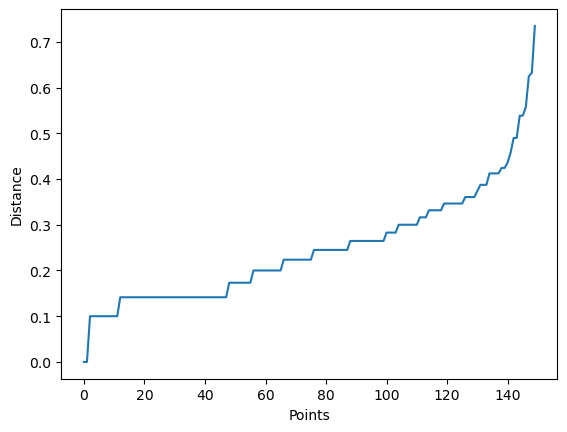

In [17]:
sns.lineplot(x=list(range(len(distances))), y=distances)
plt.xlabel("Points")
plt.ylabel("Distance")
plt.show()

## DBSCAN Clustering

In [34]:
dbscan = DBSCAN(eps=0.5, min_samples=5, n_jobs=-1)
predicted_clusters = dbscan.fit_predict(X)

In [35]:
df["Cluster"] = predicted_clusters
df.sample(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species,Species_Name,Cluster
140,6.7,3.1,5.6,2.4,2,virginica,1
139,6.9,3.1,5.4,2.1,2,virginica,1
123,6.3,2.7,4.9,1.8,2,virginica,1
25,5.0,3.0,1.6,0.2,0,setosa,0
124,6.7,3.3,5.7,2.1,2,virginica,1
107,7.3,2.9,6.3,1.8,2,virginica,1
89,5.5,2.5,4.0,1.3,1,versicolor,1
118,7.7,2.6,6.9,2.3,2,virginica,-1
116,6.5,3.0,5.5,1.8,2,virginica,1
146,6.3,2.5,5.0,1.9,2,virginica,1


In [36]:
df = df.astype({"Cluster": "category"})

## Scatter Plot

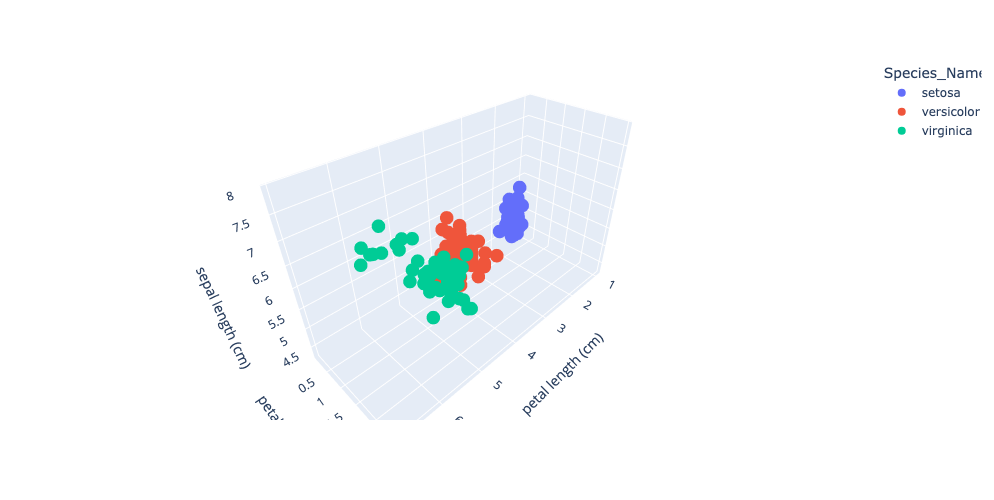

In [37]:
fig = px.scatter_3d(df,
                    x="petal length (cm)",
                    y="petal width (cm)",
                    z="sepal length (cm)",
                    color="Species_Name",
                    height=500)
fig.show()

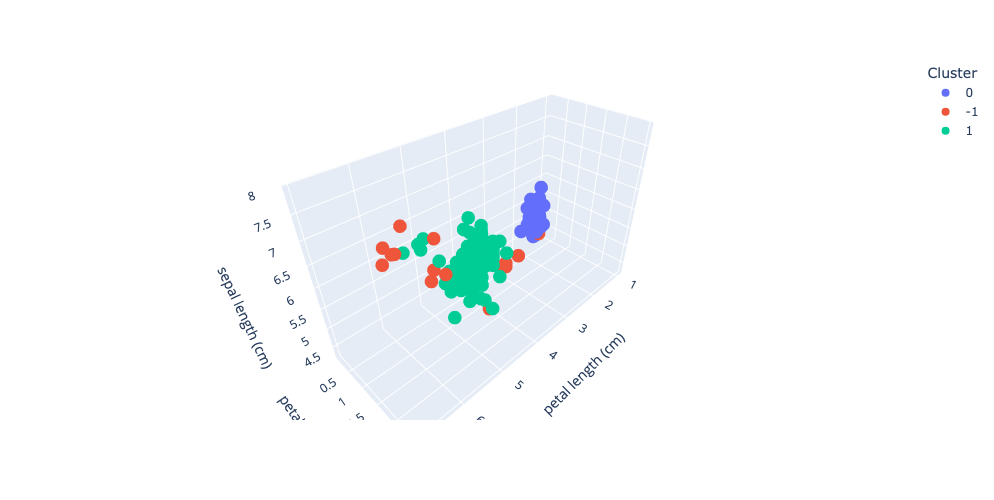

In [38]:
fig = px.scatter_3d(df,
                    x="petal length (cm)",
                    y="petal width (cm)",
                    z="sepal length (cm)",
                    color="Cluster",
                    height=500)
fig.show()